RAINSTORM 

## Compare labels
- This notebook will will compare manual labels, geolabels and autolabels
- I have labeled the example videos myself using the RAINSTORM labeler tool, and left those manual labels available on the example folder (there is no need to move them)
- If you want to see the original videos and label them to compare yourself with the machine, feel free to write: simple.torm@gmail.com

#### Requirements:
- The position.csv files processed by 1-Prepare_positions.ipynb
- Geolabels, autolabels and manual labels for those same positions

---
#### 1. Load the necessary modules

In [1]:
import os
from glob import glob
import pandas as pd
import rainstorm.compare_labels as rst

---
#### 2. State your project path
`base` : The path to the downloaded repository.

If each step was followed without modifications, the path to each label type should be automatically found.

In [2]:
# State your path:
base = r'C:\Users\dhers\Desktop\RAINSTORM'
folder_path = os.path.join(base, r'docs\examples\NOR_example_copy')

TS_position = glob(os.path.join(folder_path,"TS/position/*position.csv")) # Notice that I added 'TS' on the folder name to only compare files from the testing session

TS_manual_labels = glob(os.path.join(folder_path,"TS manual labels/*labels.csv"))
TS_geolabels = glob(os.path.join(folder_path,"TS/geolabels/*labels.csv"))
TS_autolabels = glob(os.path.join(folder_path,"TS/autolabels/*labels.csv"))

---
#### 3. We can open an example file and it's labels

In [3]:
# Choose an example file to plot:
example_path = rst.choose_example(TS_position)
example_position = pd.read_csv(example_path)
example_geolabels = pd.read_csv(example_path.replace('position', 'geolabels'))
example_autolabels = pd.read_csv(example_path.replace('position', 'autolabels'))
example_manual_labels = pd.read_csv(example_path.replace('TS/position', 'TS manual labels').replace('position', 'labels'))

Plotting coordinates from NOR_TS_C5_D_position.csv


---
#### 4. Plot comparisons
To start comparing labels, we will plot the time series corresponding to the video, indicating the predictions made by the geometric and automatic methods, and manually.

We will also plot the distance and angle from the mouse to each object, in order to relate their minima to the predictions.

In [4]:
# Since the geometric and automatic labels are slightly shorter
# (due to the time when the mouse hasn't yet entered the arena), 
# we need to remove the first few rows from the manual labels.

len_dif = len(example_manual_labels) - len(example_geolabels)
example_manual_labels = example_manual_labels.iloc[len_dif:].reset_index(drop=True)

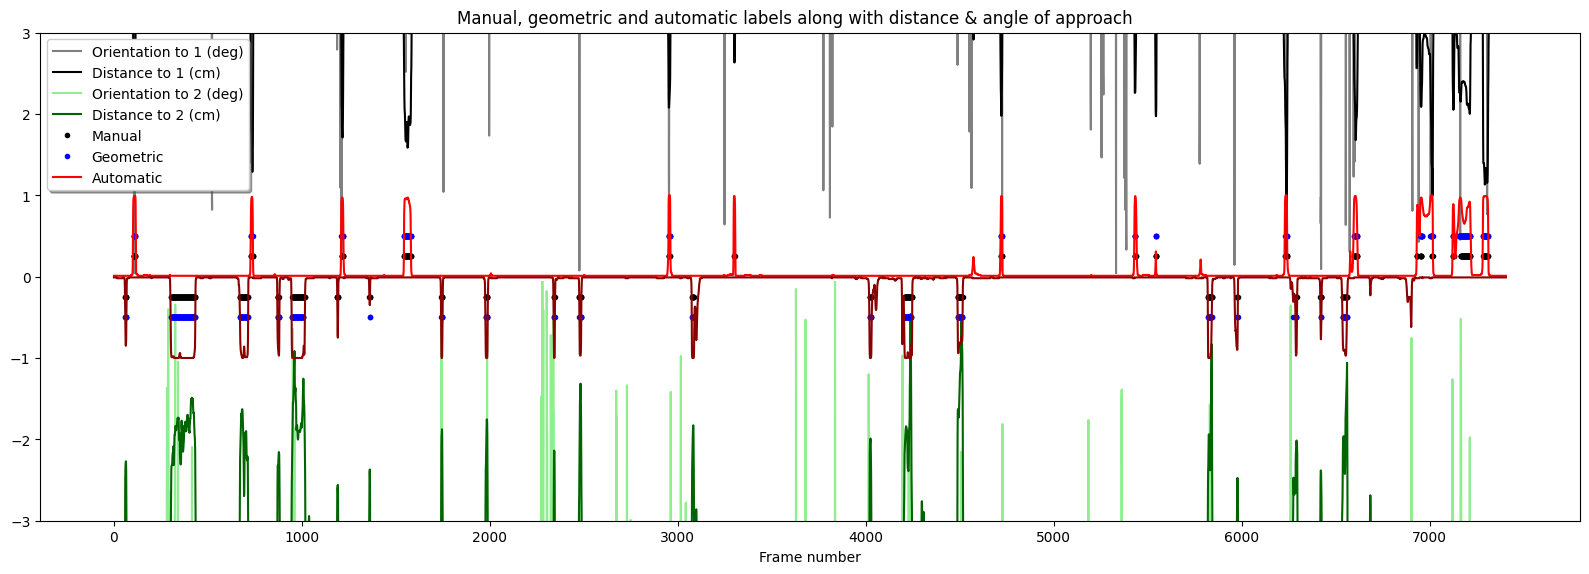

In [5]:
rst.plot_timeline(example_position, example_manual_labels, example_geolabels, example_autolabels)

---
#### 5. Polar graph
Up next we have a different way of visualizing the distance and angle of approach to the two objects in a polar graph. The distance is represented by the radius of the circle, and the angle is represented by the angle of the vector from the head to the nose.

Since the graph is symmetrical, we will use the left side to color the automatic labels in red, and the right side to color the manual labels in blue. The graph will also show the geometric labels as all the points that fit inside the dashed line.

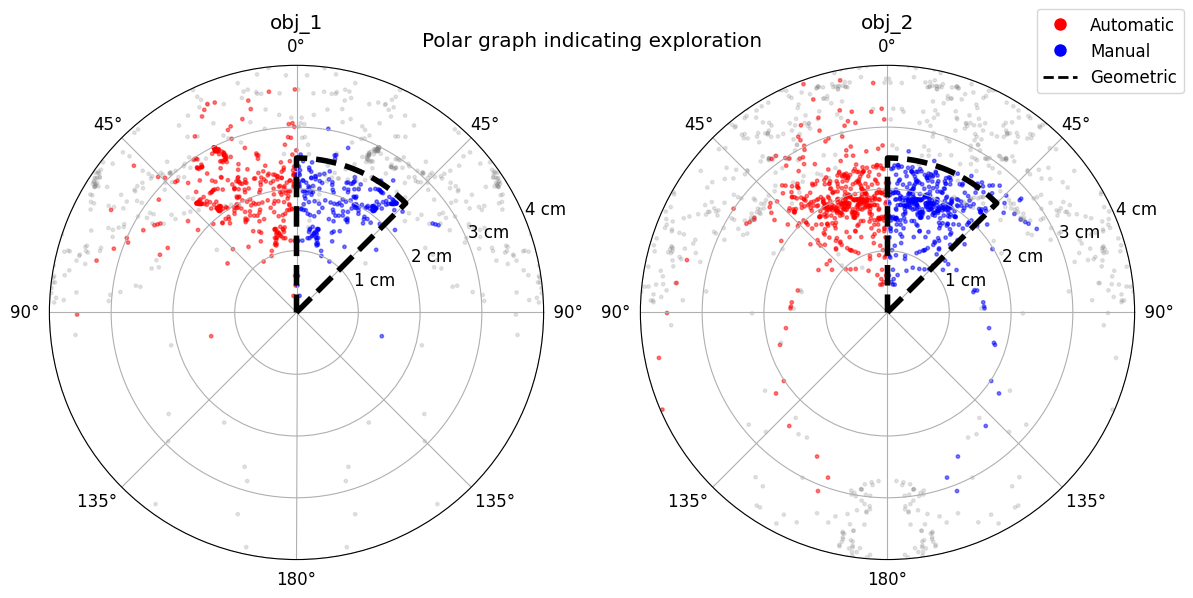

In [6]:
rst.polar_graph(example_position, example_autolabels, example_manual_labels)

#### We can load all the data from the csv files and plot the polar graph again

In [7]:
# Create an empty list to store DataFrames
for_manual_labels = []
for_geolabels = []
for_autolabels = []
for_position = []

for i in range(len(TS_position)):

    df_position = pd.read_csv(TS_position[i])
    for_position.append(df_position)

    df_manual_labels = pd.read_csv(TS_manual_labels[i])
    len_dif = len(df_manual_labels) - len(df_position)
    df_manual_labels = df_manual_labels.iloc[len_dif:].reset_index(drop=True)
    for_manual_labels.append(df_manual_labels)

    df_geolabels = pd.read_csv(TS_geolabels[i])
    for_geolabels.append(df_geolabels)

    df_autolabels = pd.read_csv(TS_autolabels[i])
    for_autolabels.append(df_autolabels)
     

# Concatenate all DataFrames into a single DataFrame
all_manual_labels = pd.concat(for_manual_labels, ignore_index=True)
all_geolabels = pd.concat(for_geolabels, ignore_index=True)
all_autolabels = pd.concat(for_autolabels, ignore_index=True)
all_position = pd.concat(for_position, ignore_index=True)

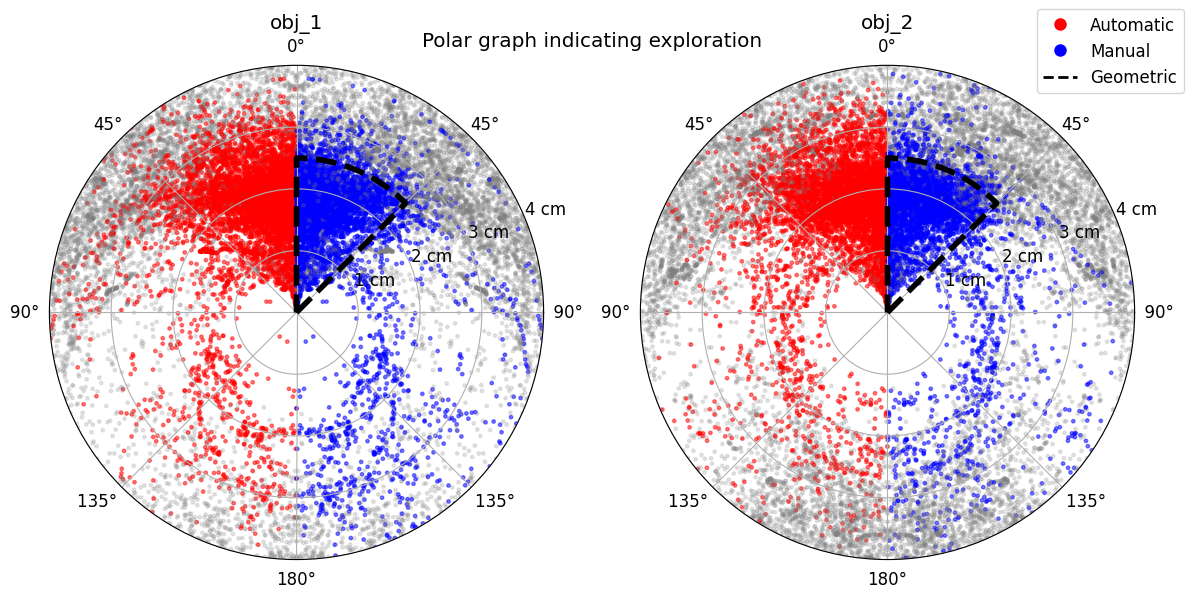

In [8]:
rst.polar_graph(all_position, all_autolabels, all_manual_labels)

---
#### 6. Evaluate accuracy of predictions
Finally, we can evaluate the accuracy of the predictions by comparing the geometric and automatic labels to the manual labels.

In [9]:
rst.accuracy_scores(all_manual_labels, all_geolabels, "geometric")
rst.accuracy_scores(all_manual_labels, all_autolabels, "automatic", threshold=0.8)

Mice explored 6.96052070140267% of the time.
The geometric method measured 6.1152614005025505% of the time as exploration.
It got 25.96088352632091% of false negatives and 13.817261846842463% of false positives.
Mice explored 6.96052070140267% of the time.
The automatic method measured 7.110202035937066% of the time as exploration.
It got 16.152573708280627% of false negatives and 18.91602607764912% of false positives.


---
---
#### Both geometric and automatic methods are flawed when compared to human labeling. However, as the human responsible for the example manual labels provided, let me tell you that I too am flawed. Probably if more people labeled these videos and we compare against the average labels, we would have less error.

We can:
- Go to 7-Seize_labels.ipynb and use your favorite labels (geo, auto or manual) to plot the results of the experiment

---
RAINSTORM - Created on Apr 30, 2024 - @author: Santiago D'hers